# Visualizing Agente Based Models with dynamical behavior

### Reference: [Library](https://towardsdatascience.com/visualizing-dynamical-behavior-in-agent-based-models-70bb81dc0e93)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def HSVToRGB(HSV):

    [h, s, v] = HSV

    if s == 0.0:
        return v, v, v
    i = int(h*6.)  # Assume H is given as a value between 0 and 1.
    f = (h*6.)-i
    p, q, t = v*(1.-s), v*(1.-s*f), v*(1.-s*(1.-f))
    i %= 6
    if i == 0:
        return v, t, p
    if i == 1:
        return q, v, p
    if i == 2:
        return p, v, t
    if i == 3:
        return p, q, v
    if i == 4:
        return t, p, v
    if i == 5:
        return v, p, q

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from random import random as rand
import matplotlib.colors as mcolors


class Agent:

    def __init__(
        self,
        index,
        position,
        velocity,
        empathy=1,
        xenophobia=1,
        vision=200,
        dPosition=0,
        dSpeed=0,
        dEmpathy=0,
        dXenophobia=0,
        dVision=0,
        age=0,
        plotSize=20,
    ):

        self.index = index
        self.velocity = np.array(velocity)
        self.empathy = empathy
        self.xenophobia = xenophobia
        self.vision = vision
        self.empathy = empathy
        self.species = rand()
        self.position = np.array(position)
        self.dPosition = dPosition
        self.dEmpathy = dEmpathy
        self.dXenophobia = dXenophobia
        self.dVision = dVision
        self.color = HSVToRGB([self.species, 1, 1])
        self.plotSize = plotSize

        self.pltObj = plt.Circle(self.position, self.plotSize, color=self.color)

    def updatePosition(self, agents, worldSize):

        self.updateVelocity(agents)

        self.position += self.velocity

        if self.position[0] < -worldSize / 2:
            self.position[0] += worldSize

        elif self.position[0] > worldSize / 2:
            self.position[0] -= worldSize

        if self.position[1] < -worldSize / 2:
            self.position[1] += worldSize

        elif self.position[1] > worldSize / 2:
            self.position[1] -= worldSize

        # Update visualization objects
        self.pltObj.center = self.position

    def updateVelocity(self, agents):

        herd_velocity = self.herdVelocity(agents)

        herd_magnitude = np.linalg.norm(herd_velocity)
        self_magnitude = np.linalg.norm(self.velocity)

        if herd_magnitude > 0.1:

            herd_unit_velocity = herd_velocity

            self.velocity = (
                np.linalg.norm(self.velocity)
                * (self.velocity + herd_unit_velocity)
                / np.linalg.norm(self.velocity + herd_unit_velocity)
            )

    def herdVelocity(self, agents, distFactor=100):

        herd_velocity = np.zeros(2)

        for neighbor in agents:

            if neighbor.index is not self.index:

                distance = np.linalg.norm(neighbor.position - self.position)

                if distance < self.vision and distance > 0.1:
                    herd_velocity += neighbor.velocity * (
                        0.5 - abs(self.species - neighbor.species)
                    )  # *distFactor/distance

        return herd_velocity

    def updateEmpathy(self):
        return 0

    def updateXenophobia(self):
        return 0

    def updateVision(self):
        return 0

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from random import random as rand
import matplotlib.colors as mcolors


class World:

    def __init__(
        self,
        population=1,
        spawnSize=400,
        worldSize=1200,
        worldInterval=50,
        arrows=True,
        agentSize=3,
    ):

        self.agents = []
        self.figure, self.ax = plt.subplots(figsize=(12, 8))
        self.ax.set_xlim(-worldSize / 2, worldSize / 2)
        self.ax.set_ylim(-worldSize / 2, worldSize / 2)

        self.worldInterval = worldInterval
        self.worldSize = worldSize
        self.arrows = arrows
        self.agentSize = agentSize

        for i in range(population):

            print(i)

            newAgent = Agent(
                index=i,
                position=[
                    rand() * spawnSize - spawnSize / 2,
                    rand() * spawnSize - spawnSize / 2,
                ],
                velocity=[
                    rand() * spawnSize / 10 - spawnSize / 20,
                    rand() * spawnSize / 10 - spawnSize / 20,
                ],
                plotSize=self.agentSize,
            )

            self.agents.append(newAgent)
            self.ax.add_patch(newAgent.pltObj)

            print("Created agent at", newAgent.position, "with index", newAgent.index)

        self.spawnSize = spawnSize

    def updateWorld(self, x=0):

        pltObjects = []

        arrowSize = 3

        for agent in self.agents:

            agent.updatePosition(self.agents, self.worldSize)
            agent.pltObj.center = agent.position
            pltObjects.append(agent.pltObj)

            if self.arrows is True:

                velocityArrow = plt.Arrow(
                    agent.position[0],
                    agent.position[1],
                    agent.velocity[0] * arrowSize,
                    agent.velocity[1] * arrowSize,
                    width=arrowSize * 10,
                    color=agent.color,
                )

                self.ax.add_patch(velocityArrow)

                pltObjects.append(velocityArrow)

        return pltObjects

    def start(self):

        ani = animation.FuncAnimation(
            self.figure,
            self.updateWorld,
            frames=1000,
            interval=self.worldInterval,
            blit=True,
        )

        plt.show()

SETUP
0
Created agent at [ 74.02410636 109.78154246] with index 0
1
Created agent at [ 91.70984253 120.00680185] with index 1
2
Created agent at [-181.77612393  -31.00582601] with index 2
3
Created agent at [73.55415108 -0.65642943] with index 3
4
Created agent at [-77.32402647 -64.6181684 ] with index 4
5
Created agent at [143.75432366 146.40546882] with index 5
6
Created agent at [ 153.1886988  -130.15260877] with index 6
7
Created agent at [  4.46709267 125.63300372] with index 7
8
Created agent at [-43.6841743  199.89337611] with index 8
9
Created agent at [-118.75767084  -66.62667129] with index 9
10
Created agent at [  15.54989534 -175.10004809] with index 10
11
Created agent at [ 197.94236705 -125.92730718] with index 11
12
Created agent at [136.43344962 125.24213775] with index 12
13
Created agent at [141.75633256 123.33433754] with index 13
14
Created agent at [  59.9117592  -122.59902639] with index 14
15
Created agent at [-148.63826175   17.71459327] with index 15
16
Created

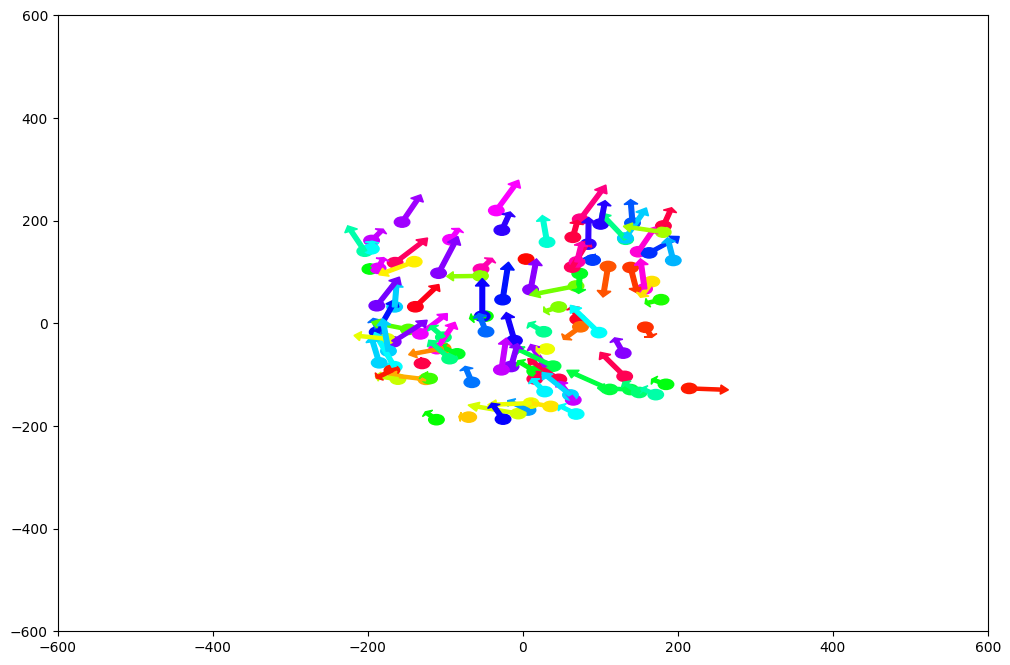

In [8]:
print('SETUP')

world = World(population=100,agentSize=10)

print('\n\nSIMULATION')

while True:
    world.start()